In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [2]:
train=pd.read_csv('train (1).csv')
train.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


In [3]:
test=pd.read_csv('test.csv')

In [4]:
combined=pd.concat([train,test])

In [5]:
combined.head()

,ID,year_of_poll,own_self_emp,veteran benefits,currently_enrolled,race,father_country,educ,house_stat,major_ind_code,...,income_filled,weeks_worked,under18,hourly_wage,unemp_reason,citizenship,woker_type,fed_liability,full_partime_job,income
0,0,2004,0,2,High school,White,United-States,Associates degree-academic program,Householder,Business and repair services,...,No,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
1,1,2005,0,0,College/University,White,Japan,Children,Child <18 never marr not in subfamily,Not in universe or children,...,No,0,Both_Pr,0.0,NaN,NB_US,NaN,Nonfiler,Children/Armed_Forces,More than 50K $
2,2,2004,0,2,NaN,White,United-States,Some college but no degree,Secondary individual,Manufacturing-durable goods,...,Yes,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $
3,3,2004,0,2,College/University,Amer/Indian/Aleut/Eskimo,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Joint_both_under65,Children/Armed_Forces,More than 50K $
4,4,2004,0,2,NaN,White,United-States,High school graduate,Householder,Wholesale trade,...,NaN,47,NaN,0.0,NaN,NB_US,Pvt,Single,Children/Armed_Forces,More than 50K $


## Var 1 : ID

In [6]:
combined.ID.value_counts()

0         1
98002     1
97996     1
97997     1
97998     1
         ..
48994     1
48993     1
48992     1
48991     1
149999    1
Name: ID, Length: 147000, dtype: int64

#### We will drop this column

## Var2 :year_of_poll

In [7]:
combined.year_of_poll.value_counts()

2005    73613
2004    73387
Name: year_of_poll, dtype: int64

#### only two years data present

In [8]:
tbl_2=pd.crosstab(combined.year_of_poll,combined.income)

<AxesSubplot:xlabel='year_of_poll'>

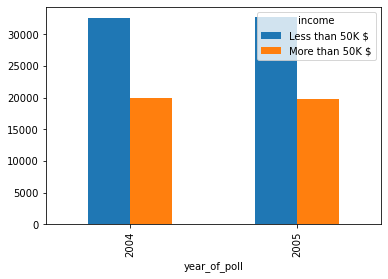

In [9]:
tbl_2.plot.bar()

### we will drop this column as distribution of both the columns are same

## Var3:own_self_emp

In [10]:
combined.own_self_emp.value_counts()

0    133131
2     11890
1      1979
Name: own_self_emp, dtype: int64

In [11]:
combined.own_self_emp.isnull().sum()

0

In [12]:
tbl_3=pd.crosstab(combined.own_self_emp,combined.income)

<AxesSubplot:xlabel='own_self_emp'>

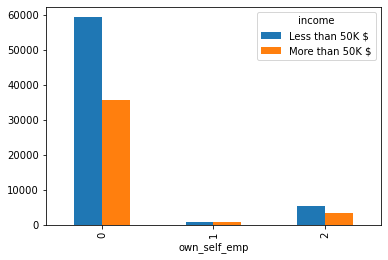

In [13]:
tbl_3.plot.bar()

## Var 3 : veteran benefits

In [14]:
combined['veteran benefits'].value_counts()

2    110712
0     34824
1      1464
Name: veteran benefits, dtype: int64

In [15]:
combined['veteran benefits'].isnull().sum()

0

In [16]:
c,p,dof,expected=chi2_contingency(tbl_3)

In [17]:
p

1.4125477474732505e-16

## Var4 : currently_enrolled

In [18]:
combined.currently_enrolled.value_counts()

College/University    59345
 High school          43599
Name: currently_enrolled, dtype: int64

In [19]:
combined.currently_enrolled.isnull().sum()

44056

In [20]:
combined['currently_enrolled']=combined.currently_enrolled.str.strip()

In [21]:
combined.currently_enrolled.fillna('not enrolled',inplace=True)

<AxesSubplot:>

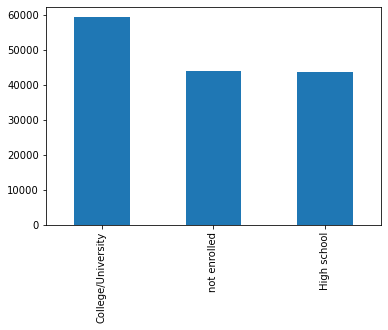

In [22]:
combined.currently_enrolled.value_counts().plot.bar()

In [23]:
tbl_4=pd.crosstab(combined.currently_enrolled,combined.income)

<AxesSubplot:xlabel='currently_enrolled'>

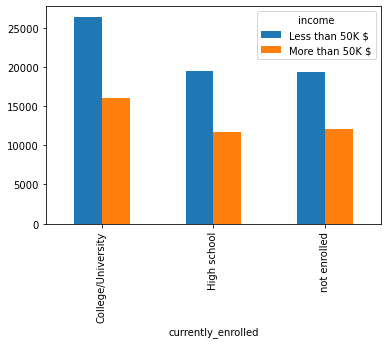

In [24]:
tbl_4.plot.bar()

## var 5 : race

In [25]:
combined.race.value_counts()

 White                      123330
 Black                       15042
Asian/Pacific_Islander        4269
 Other                        2713
Amer/Indian/Aleut/Eskimo      1646
Name: race, dtype: int64

In [26]:
combined['race']=combined.race.str.strip()

In [27]:
combined.race.isnull().sum()

0

In [28]:
tbl_5=pd.crosstab(combined.race,combined.income)

<AxesSubplot:xlabel='race'>

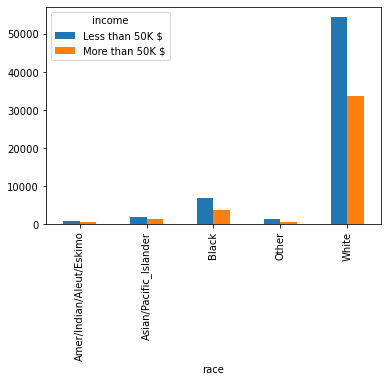

In [29]:
tbl_5.plot.bar()

In [30]:
# we have more data of white peoples and they are earning more

In [31]:
def mapp(x):
    if x=='White':
        return 1
    else: 
        return 0

In [32]:
combined['race']=combined.race.apply(mapp)

## var 6 : father_country

In [33]:
combined.father_country.value_counts()

 United-States                   117270
 Mexico                            7404
 ?                                 4915
 Puerto-Rico                       2007
 Italy                             1638
 Germany                           1018
 Canada                             992
 Dominican-Republic                 947
 Poland                             881
 Philippines                        855
 Cuba                               814
 El-Salvador                        735
 China                              626
 England                            580
 Columbia                           445
 India                              421
 South Korea                        389
 Ireland                            372
 Jamaica                            345
 Vietnam                            340
 Guatemala                          340
 Japan                              283
 Portugal                           282
 Haiti                              267
 Ecuador                            265


In [34]:
combined['father_country']=combined['father_country'].str.strip()

In [35]:
combined['father_country']=combined.father_country.str.replace('?','No data')

In [36]:
mappp=combined.father_country.value_counts()/len(combined)

In [37]:
combined['father_country']=combined.father_country.map(mappp)

In [38]:
combined['father_country'].isnull().sum()

0

## Var7: educ

In [39]:
combined.educ.value_counts()

 High school graduate                      35707
 Children                                  34832
 Some college but no degree                20562
 Bachelors degree(BA AB BS)                14649
 7th and 8th grade                          5895
 10th grade                                 5590
 11th grade                                 5025
 Masters degree(MA MS MEng MEd MSW MBA)     4794
 9th grade                                  4622
 Associates degree-occup /vocational        3990
 Associates degree-academic program         3218
 5th or 6th grade                           2441
 12th grade no diploma                      1517
 1st 2nd 3rd or 4th grade                   1334
 Prof school degree (MD DDS DVM LLB JD)     1304
 Doctorate degree(PhD EdD)                   919
 Less than 1st grade                         601
Name: educ, dtype: int64

In [40]:
combined['educ']=combined.educ.str.strip()

In [41]:
combined.educ.unique()

array(['Associates degree-academic program', 'Children',
       'Some college but no degree', 'High school graduate', '10th grade',
       'Prof school degree (MD DDS DVM LLB JD)',
       'Bachelors degree(BA AB BS)', '7th and 8th grade',
       '5th or 6th grade', '9th grade', '11th grade',
       'Masters degree(MA MS MEng MEd MSW MBA)',
       'Associates degree-occup /vocational', '1st 2nd 3rd or 4th grade',
       'Less than 1st grade', '12th grade no diploma',
       'Doctorate degree(PhD EdD)'], dtype=object)

In [42]:
lst=[]
for i in combined.educ:
    if i in ['Associates degree-academic program',
       'Prof school degree (MD DDS DVM LLB JD)',
       'Bachelors degree(BA AB BS)',
       'Masters degree(MA MS MEng MEd MSW MBA)',
       'Associates degree-occup /vocational',
       'Doctorate degree(PhD EdD)']:
        lst.append('Graduate')
    else:
        lst.append('Not graduate')

In [43]:
combined['educ']=lst

In [44]:
combined.educ.isnull().sum()

0

<AxesSubplot:>

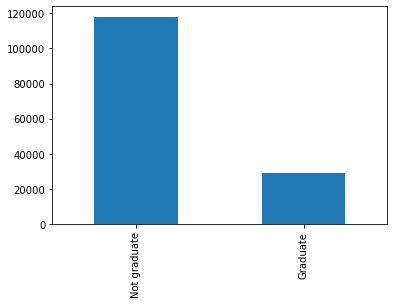

In [45]:
combined.educ.value_counts().plot.bar()

In [46]:
tbl_7=pd.crosstab(combined.income,combined.educ)

<AxesSubplot:xlabel='income'>

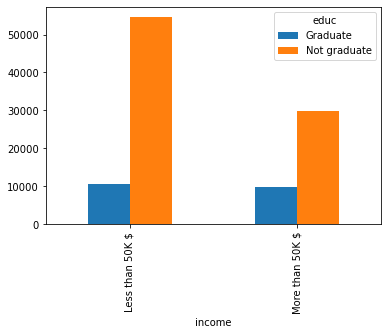

In [47]:
tbl_7.plot.bar()

In [48]:
s,p,dof,expe=chi2_contingency(tbl_7)
print(p)

8.266184068901767e-247


## var_8: house_stat

In [49]:
combined.house_stat.isnull().sum()

14

In [50]:
mapp=combined.house_stat.value_counts()/len(combined)

In [51]:
combined['house_stat']=combined.house_stat.map(mapp)

In [52]:
combined.fillna(0,inplace=True)

In [53]:
combined.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job', 'income'],
      dtype='object')

## var9: major_ind_code

In [54]:
combined.major_ind_code.isnull().sum()

0

In [55]:
combined.major_ind_code.value_counts()

 Not in universe or children            74123
 Retail trade                           12508
 Manufacturing-durable goods             6726
 Education                               6035
 Manufacturing-nondurable goods          5137
 Finance insurance and real estate       4472
 Construction                            4464
 Business and repair services            4164
 Medical except hospital                 3503
 Public administration                   3384
 Other professional services             3313
 Transportation                          3079
 Hospital services                       2960
 Wholesale trade                         2643
 Agriculture                             2267
 Personal services except private HH     2137
 Social services                         1869
 Entertainment                           1188
 Communications                           897
 Utilities and sanitary services          857
 Private household services               706
 Mining                           

In [56]:
combined.major_ind_code=combined.major_ind_code.str.strip()

In [57]:
combined.major_ind_code.unique()

array(['Business and repair services', 'Not in universe or children',
       'Manufacturing-durable goods', 'Wholesale trade', 'Entertainment',
       'Construction', 'Hospital services',
       'Finance insurance and real estate',
       'Personal services except private HH', 'Retail trade',
       'Other professional services', 'Communications',
       'Manufacturing-nondurable goods', 'Agriculture', 'Education',
       'Private household services', 'Public administration',
       'Medical except hospital', 'Armed Forces', 'Social services',
       'Transportation', 'Forestry and fisheries', 'Mining',
       'Utilities and sanitary services'], dtype=object)

In [58]:
mapp={'Business and repair services':3, 'Not in universe or children':0,
       'Manufacturing-durable goods':1, 'Wholesale trade':2, 'Entertainment':3,
       'Construction':1, 'Hospital services':2,
       'Finance insurance and real estate':3,
       'Personal services except private HH':2, 'Retail trade':3,
       'Other professional services':1, 'Communications':2,
       'Manufacturing-nondurable goods':2, 'Agriculture':1, 'Education':0,
       'Private household services':1, 'Public administration':2,
       'Medical except hospital':2, 'Armed Forces':2, 'Social services':1,
       'Transportation':2, 'Forestry and fisheries':1, 'Mining':1,
       'Utilities and sanitary services':0}

In [59]:
combined.major_ind_code=combined.major_ind_code.map(mapp)

In [60]:
combined.major_ind_code.value_counts()

0    81015
2    23770
3    22332
1    19883
Name: major_ind_code, dtype: int64

## var10: labour_union

In [61]:
combined.labour_union.isnull().sum()

0

In [62]:
combined.labour_union.value_counts()

no     82691
0      49668
yes    14641
Name: labour_union, dtype: int64

In [63]:
combined.labour_union=combined.labour_union.map({'no':0,'yes':1,0:0})

## var_11:self_country

In [64]:
combined.self_country.isnull().sum()

0

In [65]:
mapp=combined.self_country.value_counts()/len(combined)

In [66]:
combined.self_country=combined.self_country.map(mapp)

## VAR_11: major_occ_code

In [67]:
combined.major_occ_code.isnull().sum()

0

In [68]:
#combined.major_occ_code=combined.major_occ_code.str.strip()

In [69]:
combined.major_occ_code

0                           Protective services
1                                             0
2         Machine operators assmblrs & inspctrs
3                  Handlers equip cleaners etc 
4                Executive admin and managerial
                          ...                  
41995                                         0
41996       Precision production craft & repair
41997                                         0
41998        Transportation and material moving
41999            Executive admin and managerial
Name: major_occ_code, Length: 147000, dtype: object

In [70]:
combined.major_occ_code.value_counts()

0                                         74123
 Adm support including clerical           10874
 Professional specialty                   10218
 Executive admin and managerial            9252
 Other service                             8829
 Sales                                     8609
 Precision production craft & repair       7814
 Machine operators assmblrs & inspctrs     4786
 Handlers equip cleaners etc               3078
 Transportation and material moving        2980
 Farming forestry and fishing              2359
 Technicians and related support           2246
 Protective services                       1215
 Private household services                 587
 Armed Forces                                30
Name: major_occ_code, dtype: int64

## Var_12: Age

In [71]:
combined.age.isnull().sum()

0

In [72]:
combined.age.describe()

count    147000.000000
mean         36.207898
std          23.433648
min           0.000000
25%          16.000000
50%          35.000000
75%          52.000000
max          94.000000
Name: age, dtype: float64

In [73]:
combined.fillna(36,inplace=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

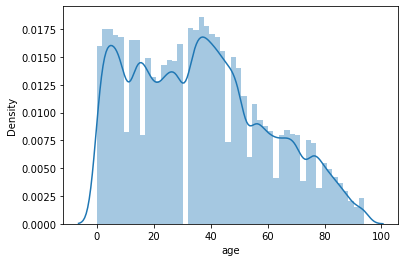

In [74]:
sns.distplot(combined.age)

## Var_13: mother_country

In [75]:
combined.mother_country.value_counts()

 United-States                   118213
 Mexico                            7265
 ?                                 4492
 Puerto-Rico                       1865
 Italy                             1356
 Canada                            1035
 Germany                           1008
 Philippines                        911
 El-Salvador                        830
 Dominican-Republic                 810
 Cuba                               801
 Poland                             797
 England                            670
 China                              553
 South Korea                        452
 Columbia                           443
 Ireland                            437
 India                              415
 Vietnam                            346
 Japan                              345
 Jamaica                            336
 Guatemala                          336
 Ecuador                            271
 Haiti                              269
 Peru                               262


In [76]:
mapp=combined.mother_country.value_counts()/len(combined)

In [77]:
combined.mother_country=combined.mother_country.map(mapp)

## var_14: house_summary

In [78]:
combined.house_summary.isnull().sum()

0

In [79]:
combined.house_summary.value_counts()

 Householder           55671
Child_U18_Unmarried    37066
Spouse                 30722
Child_Above18          10702
Relative                7111
Non_Relative            5595
Sy_Individual            105
Child_U18_Married         28
Name: house_summary, dtype: int64

In [80]:
combined.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job', 'income'],
      dtype='object')

## var_15:gender

In [81]:
combined.gender.value_counts()

F    76400
M    70600
Name: gender, dtype: int64

In [82]:
combined.gender=combined.gender.map({'F':0,'M':1})

## var_16: hisp_origin

In [83]:
combined.hisp_origin.isnull().sum()

0

In [84]:
combined.hisp_origin.value_counts()

All_Other                 126503
Mex_Amer                    5982
Mexican_Mexicano            5358
Central/South_American      2929
Puer_Ric                    2451
Other_Spanish               1867
 Cuban                       822
 NA                          648
 Chicano                     221
 Do not know                 219
Name: hisp_origin, dtype: int64

In [85]:
combined.hisp_origin=combined.hisp_origin.str.strip()

In [86]:
combined.hisp_origin=combined.hisp_origin.str.replace('NA','All_Other')

In [87]:
combined.hisp_origin.value_counts()

All_Other                 127151
Mex_Amer                    5982
Mexican_Mexicano            5358
Central/South_American      2929
Puer_Ric                    2451
Other_Spanish               1867
Cuban                        822
Chicano                      221
Do not know                  219
Name: hisp_origin, dtype: int64

In [88]:
combined.hisp_origin.unique()

array(['All_Other', 'Mex_Amer', 'Chicano', 'Puer_Ric', 'Other_Spanish',
       'Central/South_American', 'Cuban', 'Mexican_Mexicano',
       'Do not know'], dtype=object)

In [89]:
lst=[]
for i in combined.hisp_origin:
    if i in ['Puer_Ric',
    'Central/South_American','Cuban','Puer_Ric']:
        lst.append('American')
    elif i in ['Mex_Amer','Chicano','Mexican_Mexicano']:
        lst.append('Maxican')    
    else:
        lst.append('Others')

In [90]:
len(lst)

147000

In [91]:
combined.hisp_origin=lst

## var_17 : gains

In [92]:
combined.gains.isnull().sum()

0

<AxesSubplot:xlabel='gains'>

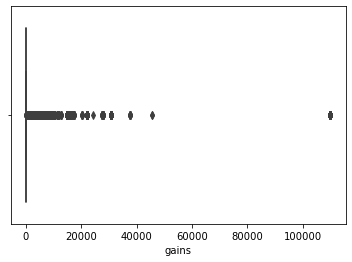

In [93]:
sns.boxplot(combined.gains)

## var_18: dividends

In [94]:
combined.dividends.value_counts()

0.0        131435
120.0         836
600.0         761
1200.0        657
240.0         644
            ...  
1287.6          1
4455.6          1
45446.4         1
20450.4         1
3714.0          1
Name: dividends, Length: 1332, dtype: int64

<AxesSubplot:xlabel='dividends'>

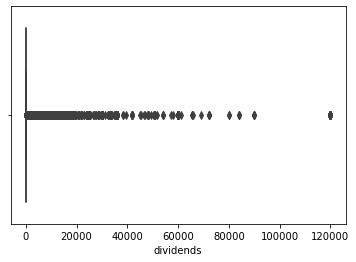

In [95]:
sns.boxplot(combined.dividends)

## var_19 : marriage_status

In [96]:
combined.marriage_status.isnull().sum()

0

In [97]:
combined.marriage_status.value_counts()

Unmarried                 63715
Married_civilian_Sp_Pr    61995
 Divorced                  9398
 Widowed                   7731
 Separated                 2586
Married_Sp_Ab              1075
Married_AF_Sp_Pr            500
Name: marriage_status, dtype: int64

In [98]:
combined.marriage_status=combined.marriage_status.map({'Unmarried':'Unmarried','Married_civilian_Sp_Pr':'Married',' Divorced':'Separated',' Widowed':'Separated'
                             ,'Separated':'Separated','Married_Sp_Ab':'Married','Married_AF_Sp_Pr':'Married'})

In [99]:
combined.marriage_status.ffill(inplace=True)

In [100]:
combined.marriage_status.value_counts()

Unmarried    64891
Married      64678
Separated    17431
Name: marriage_status, dtype: int64

## var_20: losses

In [101]:
combined.losses.isnull().sum()

0

<AxesSubplot:xlabel='losses'>

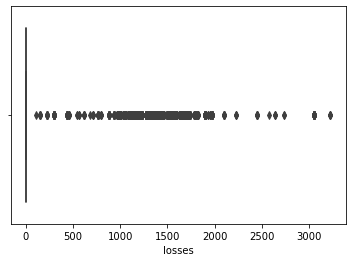

In [102]:
sns.boxplot(combined.losses)

In [103]:
combined.columns

Index(['ID', 'year_of_poll', 'own_self_emp', 'veteran benefits',
       'currently_enrolled', 'race', 'father_country', 'educ', 'house_stat',
       'major_ind_code', 'labour_union', 'self_country', 'major_occ_code',
       'age', 'mother_country', 'house_summary', 'gender', 'hisp_origin',
       'gains', 'dividends', 'marriage_status', 'losses', 'employer_of',
       'house_1yr_ago', 'income_filled', 'weeks_worked', 'under18',
       'hourly_wage', 'unemp_reason', 'citizenship', 'woker_type',
       'fed_liability', 'full_partime_job', 'income'],
      dtype='object')

## var_21: employer_of

In [104]:
combined.employer_of.value_counts()

0    70641
6    26867
1    17053
4    10604
3     9885
2     7479
5     4471
Name: employer_of, dtype: int64

In [105]:
combined.employer_of.isnull().sum()

0

## var_22: house_1yr_ago

In [106]:
combined.house_1yr_ago.value_counts()

0       74720
 Yes    60711
 No     11569
Name: house_1yr_ago, dtype: int64

## var_23: income_filled

In [107]:
combined.income_filled.value_counts()

 No     78791
0       45411
 Yes    22798
Name: income_filled, dtype: int64

In [108]:
combined.income_filled.isnull().sum()

0

## var_24: weeks_worked

In [109]:
combined.weeks_worked.value_counts()

0     70641
47    51805
36     2100
45     1683
23     1676
43     1375
32     1325
11     1311
40     1122
27     1001
14      984
18      962
22      922
7       841
4       794
29      659
46      590
9       529
41      506
5       495
35      443
38      422
25      398
44      393
12      371
2       337
1       331
3       295
39      280
20      280
34      270
15      250
42      208
16      200
13      197
8       170
31      160
6       108
19       92
33       86
37       64
24       56
30       53
21       52
10       51
26       48
28       34
17       30
Name: weeks_worked, dtype: int64

In [110]:
combined.weeks_worked.isnull().sum()

0

## var_25: under18

In [111]:
combined.under18.value_counts()

0           106356
Both_Pr      28652
Only_Mom      9431
Only_Dad      1375
Both_Ab       1186
Name: under18, dtype: int64

In [112]:
combined.under18.isnull().sum()

0

### DROP THIS COLUMN

## var_26: hourly_wage

In [113]:
combined.hourly_wage.value_counts()

0.0       138658
850.0        537
1020.0       402
1190.0       392
1360.0       370
           ...  
1722.1         1
3068.5         1
3641.4         1
3201.1         1
2402.1         1
Name: hourly_wage, Length: 1082, dtype: int64

In [114]:
combined.hourly_wage.isnull().sum()

0

## var_27: unemp_reason

In [115]:
combined.unemp_reason.value_counts()

0                   142526
Job loser_Other       1492
 Re-entrant           1491
Job loser_layoff       728
 Job leaver            452
 New entrant           311
Name: unemp_reason, dtype: int64

In [116]:
combined.unemp_reason.isnull().sum()

0

In [117]:
combined.isnull().sum()

ID                    0
year_of_poll          0
own_self_emp          0
veteran benefits      0
currently_enrolled    0
race                  0
father_country        0
educ                  0
house_stat            0
major_ind_code        0
labour_union          0
self_country          0
major_occ_code        0
age                   0
mother_country        0
house_summary         0
gender                0
hisp_origin           0
gains                 0
dividends             0
marriage_status       0
losses                0
employer_of           0
house_1yr_ago         0
income_filled         0
weeks_worked          0
under18               0
hourly_wage           0
unemp_reason          0
citizenship           0
woker_type            0
fed_liability         0
full_partime_job      0
income                0
dtype: int64

In [119]:
combined.drop(['ID','year_of_poll','under18','unemp_reason'],axis=1,inplace=True)

In [120]:
combined.income.replace({'More than 50K $':1, 'Less than 50K $':0},inplace=True)

In [121]:
dummy_data=pd.get_dummies(combined,drop_first=True)

In [122]:
dummy_data.shape

(147000, 75)

### split the data

In [123]:
final_train=dummy_data.loc[~(dummy_data.income.isnull()),:]
final_test=dummy_data.loc[dummy_data.income.isnull(),:]

In [124]:
final_test.drop('income',axis=1,inplace=True)

In [125]:
X=final_train.drop('income',axis=1)
y=final_train.income

In [152]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,stratify=y)

In [153]:
from sklearn.metrics import classification_report,accuracy_score

In [154]:
dt=DecisionTreeClassifier()
model_dt=dt.fit(xtrain,ytrain)
pred_dt=model_dt.predict(xtest)
print(classification_report(pred_dt,ytest))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     22062
           1       0.27      0.29      0.28      7338

    accuracy                           0.63     29400
   macro avg       0.51      0.51      0.51     29400
weighted avg       0.64      0.63      0.63     29400



In [143]:
from lightgbm import LGBMClassifier

In [187]:
lg=LGBMClassifier(n_estimators=500,class_weight={0:140000/100000,1:140000/40000})
model_lg=lg.fit(xtrain,ytrain)
pred_lg=model_lg.predict(xtest)

In [188]:
print(classification_report(pred_lg,ytest))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78     23365
           1       0.26      0.35      0.30      6035

    accuracy                           0.67     29400
   macro avg       0.54      0.55      0.54     29400
weighted avg       0.70      0.67      0.68     29400



In [186]:
accuracy_score(pred_lg,ytest)

0.5741496598639456

In [139]:
y.value_counts()

0    107272
1     39728
Name: income, dtype: int64

In [147]:
from sklearn.ensemble import StackingClassifier
# type your code here
base_learners = [('Decision Tree', DecisionTreeClassifier(max_depth=9,min_samples_split=70)),
                 ('Random Forest', RandomForestClassifier(n_estimators=100,max_depth=9,min_samples_split=30))]
stack_model_AdaBoost = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier(random_state = 8))

# fit the model on train dataset
stack_model_AdaBoost.fit(xtrain, ytrain)

StackingClassifier(estimators=[('Decision Tree',
                                DecisionTreeClassifier(max_depth=9,
                                                       min_samples_split=70)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=9,
                                                       min_samples_split=30))],
                   final_estimator=AdaBoostClassifier(random_state=8))

In [149]:
pred=stack_model_AdaBoost.predict(xtest)

In [151]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     28732
           1       0.05      0.61      0.09       668

    accuracy                           0.73     29400
   macro avg       0.52      0.67      0.47     29400
weighted avg       0.97      0.73      0.83     29400



0    85818
1    31782
Name: income, dtype: int64